# Random QuickSort

In [3]:
import random
import statistics
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])

In [5]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [6]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [7]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    for p in range(1,runs+1):
          y = list(x)
          randomquicksort(y,tlist)
    
    
    teorico = 16*(math.log(16)/math.log(2))
    t_mas = teorico*1.5
    
    count = 0
    for i in range (len(tlist)):
        if (tlist[i] >= t_mas):
            count += 1
            
        
    plt.hist(tlist, facecolor='blue', edgecolor = 'black',  linewidth=1)
    plt.title("Number of comparison of Quicksort for all permutations")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    print ("n:", n)
    print ("Corridas:",runs)
    print ("Promedio experimental:",statistics.mean(tlist))
    print ("Promedio teorico:", teorico)
    print ("Diferencia entre promedio teorico y experimental:", statistics.mean(tlist) - teorico)
    print ("Desviacion estandar:",statistics.stdev(tlist))
    print ("Probabilidad que se demore 1.5 más que el promedio:", float(count)/float(len(tlist)))
    print ("Min:",min(tlist))
    print ("Max:",max(tlist))

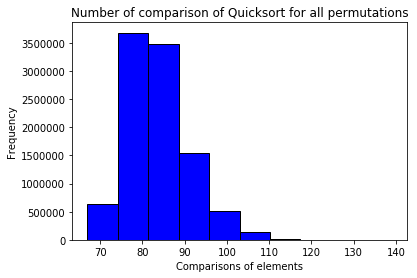

n: 16
Corridas: 10000000
Promedio experimental: 83.6650187
Promedio teorico: 64.0
Diferencia entre promedio teorico y experimental: 19.665018700000005
Desviacion estandar: 7.093257478766753
Probabilidad que se demore 1.5 más que el promedio: 0.0659083
Min: 67
Max: 139


In [8]:
randomquicksorttimedistrib(16,10000000)